# Data Wrangling + Story Telling for Capstone 1
## Update 2 Project: Work on Your Data Story


How does one go about creating a data story? You have some pointers from the material you've just gone through, but they’re probably a bit on the abstract side when you’re just getting started. Also, storytelling is an art, so you have to get your imagination going. Here are some pointers to get those creative juices flowing. In the following sections we will work step-by-step to create your first Data Story

1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

2. Get going by asking the following questions and looking for the answers with some code and plots:

Can you count something interesting?

Can you find some trends (high, low, increase, decrease, anomalies)?

Can you make a bar plot or a histogram?

Can you compare two related quantities?

Can you make a scatterplot?

Can you make a time-series plot?

3. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

4. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

The questions you asked  
The trends you investigated  
The resulting visualizations and conclusions.  
In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.  

## Import packages and dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
#load data
df=pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')

#examine the dataset
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# Data Cleaning
## User_Score datatype

From the previous inspection, it looks like 'User_Score' column is 'object' type, which seemed to be weird considering it was supposed to be all numbers


In [8]:
df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

It looks like 'User_Score' column has string 'tbd' in it. I decide to treat it as NA as convert it to numeric type

In [10]:
df['User_Score']=pd.to_numeric(df['User_Score'],errors='coerce')

## Missing Review scores
About half of the dataset doesn't have a critic nor a user score, which is the critical element for my analysis, are they all old games before the prevalence of internet and online review scores?

To find this out, I will compute the percentages of games that did not have critic scores of each year, and plot it with a bar chart

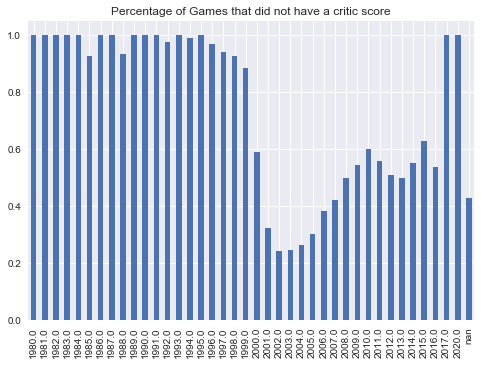

In [11]:
# Plot the percentage of games that did not have a critic score from each year
dfna=df.loc[df['Critic_Score'].isnull()]

nayear=dfna['Year_of_Release'].value_counts(dropna=False).sort_index()
year=df['Year_of_Release'].value_counts(dropna=False).sort_index()
years=pd.DataFrame({'NA':nayear,'ALL': year})
years['NApct']=years['NA']/years['ALL']

years.NApct.plot(kind='bar',title="Percentage of Games that did not have a critic score")
plt.show()


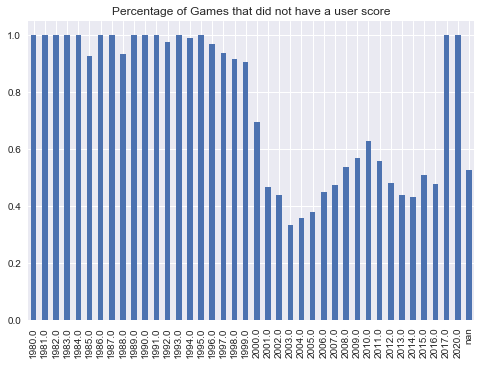

In [12]:
dfna2=df.loc[df['User_Score'].isnull()]

nayear=dfna2['Year_of_Release'].value_counts(dropna=False).sort_index()
year=df['Year_of_Release'].value_counts(dropna=False).sort_index()
years=pd.DataFrame({'NA':nayear,'ALL': year})
years['NApct']=years['NA']/years['ALL']

years.NApct.plot(kind='bar',title="Percentage of Games that did not have a user score")
plt.show()


It's pretty clear from the charts that most games that came out before 2000 did not have a critic score or a user_score, which coincided with the the incredible growth of the Internet since 2000. 

Also, it seemed that the dataset did not quite get updated with the game releases after 2016. 

So this analysis is mainly focused on the games with critic scores AND user scores from 2000 to 2016.

In [13]:
#Filter the dataset: only keeping rows with both Critic_Score and User_Score, with release date between 2000-2016
newdf=df.loc[df['Critic_Score'].notnull()]
newdf=newdf.loc[newdf['User_Score'].notnull()]
newdf=newdf[(newdf.Year_of_Release<2017) & (newdf.Year_of_Release>1999)]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6812 entries, 0 to 16709
Data columns (total 16 columns):
Name               6812 non-null object
Platform           6812 non-null object
Year_of_Release    6812 non-null float64
Genre              6812 non-null object
Publisher          6811 non-null object
NA_Sales           6812 non-null float64
EU_Sales           6812 non-null float64
JP_Sales           6812 non-null float64
Other_Sales        6812 non-null float64
Global_Sales       6812 non-null float64
Critic_Score       6812 non-null float64
Critic_Count       6812 non-null float64
User_Score         6812 non-null float64
User_Count         6812 non-null float64
Developer          6808 non-null object
Rating             6747 non-null object
dtypes: float64(10), object(6)
memory usage: 904.7+ KB


## Normalizing User_scores
It looks like User_Scores are plotted on a scale of 0-10 while Critic_Score is plotted on 0-100, let's put them on the same scale by multiplying User_Scores by 100

In [14]:
newdf.User_Score=newdf.User_Score.values*10

## Create a new column "NonNA_Sales", which indicates the total sales outside of the US
The reason I need this column is that metacritic is a US_based website and US visitors made up 36% traffic of the website, more than any other country in the world (UK has the second most visitors, but they only made up 7% of web traffic), I want to see if reviews scores from metacritic would affect the NA_sales and NonNA_Sales equally.

In [24]:
newdf['NonNA_Sales']=newdf['Global_Sales']-newdf['NA_Sales']

## Create a column "Exclusivity" indicate if a game is multi-platform or console exclusive.
A multi-platform game is a game that was released on more than one platform. An exclusive game is a game that was released on only one platform.

1 in Exclusivity column indicates a console exclusive game, 0 indicates multi-platform games 

In [65]:
#generate two lists of games:
#multiplat are the multi-platform games
#exclusive are console exclusive games
namevaluecount=newdf['Name'].value_counts(dropna=False).sort_index()
multiplat=namevaluecount[namevaluecount>1]
exclusive=namevaluecount[namevaluecount<=1]
multiplat=list(multiplat.index)
exclusive=list(exclusive.index)

Exclusivity=[]
for index, row in newdf.iterrows():
    if row['Name'] in multiplat:
        Exclusivity.append(0)
    if row['Name'] in exclusive:
        Exclusivity.append(1)

#Create a new column in dataframe indicates whether the game is exclusive or not
newdf['Exclusivity']=Exclusivity



In [66]:
newdf.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,NonNA_Sales,Exclusivity
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,41.17,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,19.84,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,17.16,1
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,Nintendo,E,18.52,1
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,Nintendo,E,14.96,1
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E,13.88,1
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,86.0,464.0,Nintendo,E,13.50,1
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,77.0,146.0,Nintendo,E,13.78,1
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,63.0,106.0,Good Science Studio,E,6.81,1
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,74.0,52.0,Nintendo,E,12.78,1


# Data Questions:
## 1. Did the game review score shift overtime?
I want to see if the critics' and users' opinions on game qualities differ for games released in each year.
To find out this question, I will plot a time series of the mean Critic_score and User_score

In [67]:
# Group df by 'Year_of_Release': by_year
by_year = newdf.groupby('Year_of_Release')

# Select 'age' and 'fare'
by_year_sub = by_year[['Critic_Score','User_Score']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_year_sub.agg(['mean'])



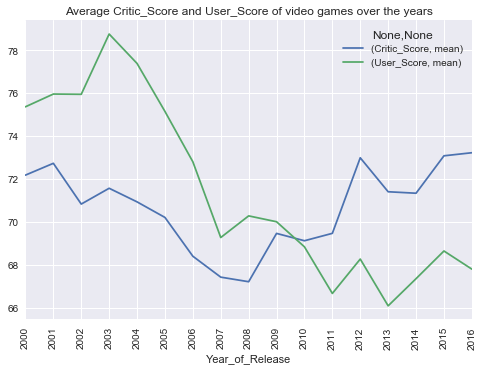

In [100]:
aggregated.plot(title='Average Critic_Score and User_Score of video games over the years')
plt.xticks(aggregated.index,rotation=90)
plt.show()

From the plot, we can see that:

1. both average critic scores and user scores hit a high point for games that came out in 2003, and both kept declining until 2007

2. For the games that came out before 2010, mean user scores are generally higher than mean critic score, however, it went the other way for game that came out in 2010 to 2016

3. The average critic score was in an upward trend since 2010, while user score kind of swing between 66-69 since 2010

## 2. Are games selling better each year?
To answer this question, I plotted the mean sale figures of each video game of each year on a time series. The reason I chose mean sales of each game instead of sum sales of all video games of each year is that some years might have seen more major game releases than the other years, so the total sale numbers might simple being attributed to the number of releases alone.

In [121]:
# agg=newdf.groupby('Year_of_Release')
# plt.plot(agg['Global_Sales'].sum(), color='blue', label='Global_Sales')
# plt.plot(agg['NA_Sales'].sum(), color='red', label='NA_Sales')
# plt.plot(agg['NonNA_Sales'].sum(), color='green', label='NonNA_Sales')
# plt.xticks(agg['Global_Sales'].sum().index)
# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('Sales in Millions')
# plt.title('Total Video Games Sales Each Year')
# plt.show()

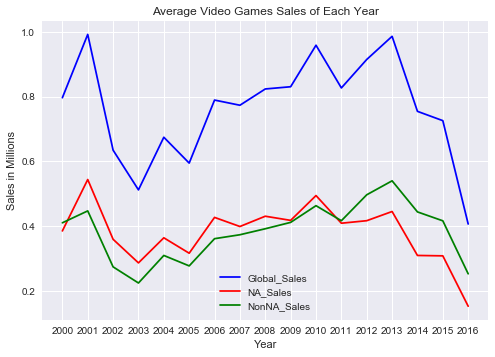

In [123]:
agg=newdf.groupby('Year_of_Release')
plt.plot(agg['Global_Sales'].mean(), color='blue', label='Global_Sales')
plt.plot(agg['NA_Sales'].mean(), color='red', label='NA_Sales')
plt.plot(agg['NonNA_Sales'].mean(), color='green', label='NonNA_Sales')
plt.xticks(agg['Global_Sales'].mean().index)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.title('Average Video Games Sales of Each Year')
plt.show()

This plot demonstrates that the non NA market started to buy more games released after 2010 than the NA market. Non_NA consumers are more interested in the games that came out after 2010 than the NA Consumers

## 3. Are review scores and game sales correlated?

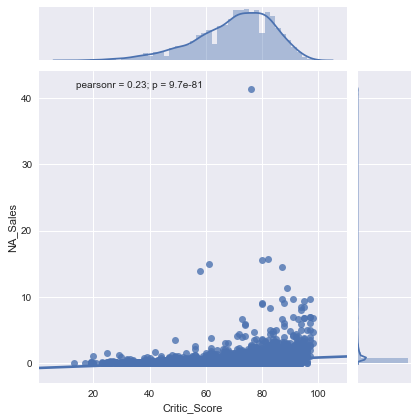

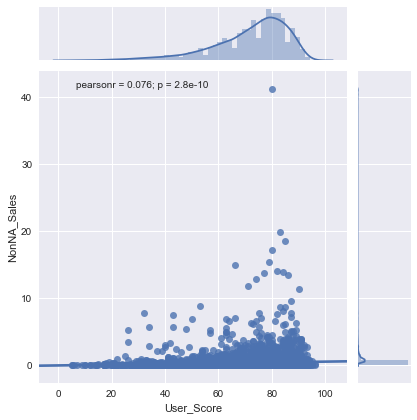

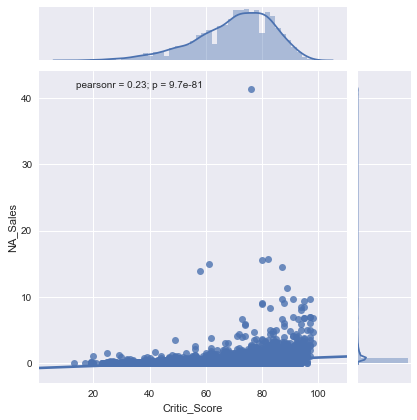

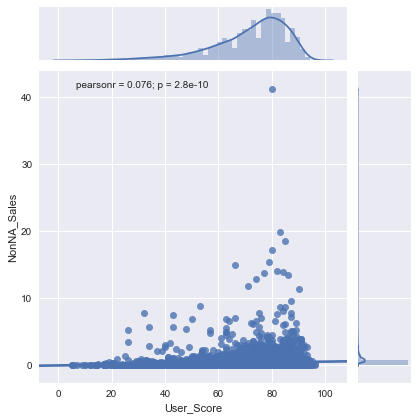

In [153]:
sns.jointplot(data=newdf, x='Critic_Score', y='NA_Sales', kind='reg')
sns.jointplot(data=newdf, x='User_Score', y='NonNA_Sales', kind='reg')
sns.jointplot(data=newdf, x='Critic_Score', y='NA_Sales', kind='reg')
sns.jointplot(data=newdf, x='User_Score', y='NonNA_Sales', kind='reg')
plt.show()

From these plots we couldn't tell much about the correlation since the R-square score is low for all the correlations I'm trying to see, only thing we can tell is:

Critic_Score is more correlated with game sales on for both NA region and non-NA regions than User_Score for games released from 2000-2016. 

In [152]:
# agg=newdf.groupby(['Year_of_Release','Exclusivity'])
# pd.DataFrame(agg['Critic_Score'].mean()).unstack().plot()
# plt.show()

# agg=newdf.groupby(['Year_of_Release','Exclusivity'])
# pd.DataFrame(agg[['User_Score']].mean()).unstack().plot()
# plt.show()

# agg=newdf.groupby(['Exclusivity'])
# pd.DataFrame(agg[['Critic_Score','User_Score']].mean()).plot()
# plt.show()


# Data Story

I was interested to see if the US based video game review aggregator website Metacritic's review score from both the critics and the user have impact on the game sale of both North America region and non-North America Region. So far my observations tell me that:

Both critic_score and user_score are positively correlated with the game sales of both NA and NonNA regions, however, 
a game's critic_score is more correlated with its sales than a game's user score. Although that correlation is still pretty low.

For reviews scores: the games that came out before 2010, average user_score are generally higher than average Critic_score, however, it went the other way for game that came out in 2010 to 2016. 

For video game sales: The Non_NA market bought more games that are released after 2010 than the NA market, as the average games sales are higher in Non_NA regions for the games that came out after 2010. So it seems that Non_NA consumers are more interested in the games that came out in recent years than the NA consumers. Maybe the foreign game market expanded while US game market shrank.

These observations make me wonder if the user_score decline for the games released after 2009 has something to do with the declining sales of video games that came out after 2010 in the NA? Because 2009 and 2010 are pretty close with each other, and since 2010, average user_score became lower than average critic_score each year and NA_Sales became lower than NonNA_Sales each year.

From these observations that, I hypothesize that:
1. Critic_score is more closely correlated with the game sales in NA before 2010 than after 2010.
2. User_score is more closely correlated with the game sales in NA after 2010 than before 2010.
3. Critic_score is more closely correlated with the game sales in Non_NA than in NA after 2010.
4. User_score is more closely correlated with the game sales in NA than in Non_NA after 2010.


I also want to find out these if time permits:
1. Console exclusive games have better user_score and critic score than the multi-platform games in the recent years due to "fanboyism"?

I will try to investigate more in the next update with inferential statistics skills.

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.009386  0.052474 -0.006390     0.042140   
NA_Sales               -0.009386  1.000000  0.841396  0.469316     0.728869   
EU_Sales                0.052474  0.841396  1.000000  0.521466     0.717997   
JP_Sales               -0.006390  0.469316  0.521466  1.000000     0.401051   
Other_Sales             0.042140  0.728869  0.717997  0.401051     1.000000   
Global_Sales            0.018706  0.956295  0.939405  0.611458     0.807106   
Critic_Score            0.013342  0.227576  0.207652  0.132963     0.190670   
Critic_Count            0.183811  0.291389  0.273395  0.188359     0.241969   
User_Score             -0.241289  0.079847  0.049749  0.117452     0.055770   
User_Count              0.216762  0.246445  0.288100  0.072145     0.242632   
NonNA_Sales             0.042673  0.845135  0.957494  0.693987     0.817256   
Exclusivity            -0.195470 -0.017897 -0.017321

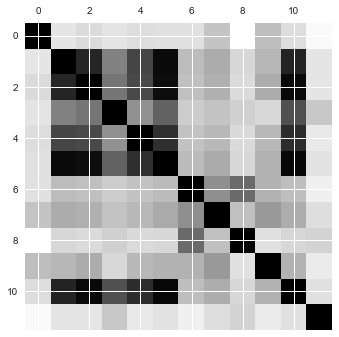

In [146]:
# print(newdf.corr())

# plt.matshow(newdf.corr())
# plt.show()